In [1]:
#Importamos librerias necesarias
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#Conexion con la base de datos 
conn = sqlite3.connect('travel.sqlite')

In [2]:
destinos = "SELECT aircraft_code AS Avion, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') THEN 1 END) AS Europe_to_Europe, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') THEN 1 END) AS Europe_to_Asia, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') THEN 1 END) AS Asia_to_Europe, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') THEN 1 END) AS Asia_to_Asia FROM flights WHERE status = 'Arrived' GROUP BY aircraft_code ORDER BY Europe_to_Europe DESC;"

Df_destinos = pd.read_sql_query(sql = destinos, con = conn)
Df_destinos

,Avion,Europe_to_Europe,Europe_to_Asia,Asia_to_Europe,Asia_to_Asia
0,SU9,2212,673,668,739
1,CN1,2183,257,258,1976
2,CR2,2050,685,683,1152
3,321,920,31,31,0
4,733,369,106,110,61
5,763,307,144,144,17
6,773,60,124,123,0
7,319,0,263,265,96


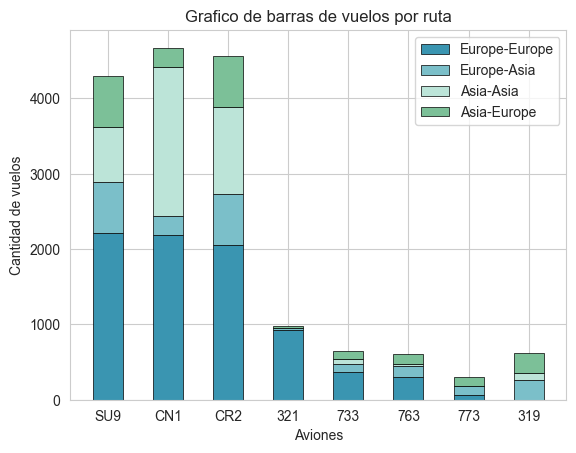

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
labels = Df_destinos['Avion']
Europa_Europa = Df_destinos['Europe_to_Europe']
Europa_Asia = Df_destinos['Europe_to_Asia']
Asia_Asia = Df_destinos['Asia_to_Asia']
Asia_Europa = Df_destinos['Asia_to_Europe']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear barras acumuladas
ax.bar(labels, Europa_Europa, 0.5, color = '#3A95B1', edgecolor = "black", linewidth = 0.5, label='Europe-Europe')
ax.bar(labels, Europa_Asia, 0.5, bottom=Europa_Europa, color = '#7BBFC9', edgecolor = "black", linewidth = 0.5, label='Europe-Asia')
ax.bar(labels, Asia_Asia, 0.5, bottom=[i+j for i,j in zip(Europa_Europa, Europa_Asia)], color = '#BCE4D8', edgecolor = "black", linewidth = 0.5, label='Asia-Asia')
ax.bar(labels, Asia_Europa, 0.5, bottom=[i+j+k for i,j,k in zip(Europa_Europa, Europa_Asia, Asia_Asia)], color = '#7CC098', edgecolor = "black", linewidth = 0.5, label='Asia-Europe')

# Configurar ejes y título
ax.set_xlabel('Aviones')
ax.set_ylabel('Cantidad de vuelos')
ax.set_title('Grafico de barras de vuelos por ruta')

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

In [35]:
vuelostotal_ruta = "SELECT COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') THEN 1 END) AS Europe_to_Europe, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') THEN 1 END) AS Europe_to_Asia, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Europe%') THEN 1 END) AS Asia_to_Europe, COUNT(CASE WHEN departure_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') AND arrival_airport IN (SELECT airport_code FROM airports_data WHERE timezone LIKE '%Asia%') THEN 1 END) AS Asia_to_Asia, COUNT(arrival_airport) AS 'Total de vuelos' FROM flights WHERE status = 'Arrived' ORDER BY Europe_to_Europe DESC;"

Df_vuelost_ruta = pd.read_sql_query(sql = vuelostotal_ruta, con = conn)
Df_vuelost_ruta

,Europe_to_Europe,Europe_to_Asia,Asia_to_Europe,Asia_to_Asia,Total de vuelos
0,8101,2283,2282,4041,16707


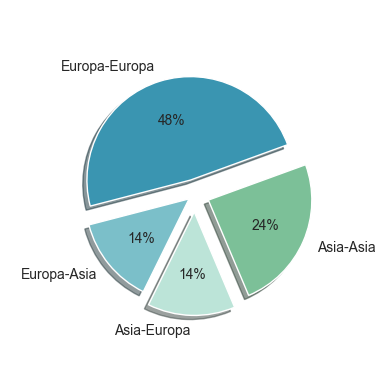

In [30]:
import matplotlib.pyplot as plt

# Datos de ejemplo
Rutas = ['Europa-Europa', 'Europa-Asia', 'Asia-Europa', 'Asia-Asia']
frecuencia = ['8101', '2283', '2282', '4041']
explotar = (0.1, 0.05, 0.12, 0.1)
colors = ['#3A95B1', '#7BBFC9', '#BCE4D8', '#7CC098']

def autopct_fun(frecuencia):
    gen = iter(frecuencia)
    return lambda pct: f"{pct:1.0f}% ({next(gen)})"

plt.pie(frecuencia, labels=Rutas, explode=explotar, colors=colors,
        autopct='%1.0f%%',
        shadow=True, startangle=20,
        pctdistance=0.6, radius=0.7, labeldistance=1.15)

plt.show()